In [1]:
# transistor parameters
# L=0.13um - W>100um

vthn = 0.4 # V
uncox = 160e-6 # A/V^2
lambdan = 0.16 # 1/V
cgsn_w_l130nm = 1.19*1e-15/1e-6 # F/m
cgdn_w_l130nm = 0.65*1e-15/1e-6 # F/m
cdbn_w = 0.31*1e-15/1e-6 # F/m
csbn_w = 0.4*1e-15/1e-6 # F/m
covn_w = 300/500*1e-15/1e-6 # F/m

vthp = 0.475 # V
upcox = 49.79e-6 # A/V^2
lambdap = 0.75 # 1/V
cgsp_w_l130nm = 0.91*1e-15/1e-6 # F/m
cgdp_w_l130nm = 0.52*1e-15/1e-6 # F/m
cdbp_w = 0.28*1e-15/1e-6 # F/m
csbp_w = 0.36*1e-15/1e-6 # F/m
covp_w = 300/500*1e-15/1e-6 # F/m

In [36]:
# rectifier modeling
# ****************************************

import numpy as np
import matplotlib.pyplot as plt

# initial values of Mn & Mp
widthn = np.array([5e-6,50e-6,100e-6,200e-6,500e-6,1000e-6]) # m
lengthn = 0.13e-6 # m
# initial values of Mn
widthp = np.array([5e-6,50e-6,100e-6,200e-6,500e-6,1000e-6]) # m
lengthp = 0.13e-6 # m

vgs = 0.5 # V
n = 4

# Inputs
# ************************
Ls = 47e-9
Rs = 0.419
f_sr = 1870e6
f_center = 403e6
q_ind = 296 #q_coil
# ************************

cgsn = cgsn_w_l130nm*widthn
cgdn = cgdn_w_l130nm*widthn
cdbn = cdbn_w*widthn
csbn = csbn_w*widthn
covn = covn_w*widthn

cgsp = cgsp_w_l130nm*widthn
cgdp = cgdp_w_l130nm*widthn
cdbp = cdbp_w*widthn
csbp = csbp_w*widthn
covp = covp_w*widthn

#c1off = (cdb + csb + 2*cov)/2
#c2off = c1off

#c1on = (cdb + csb + cgd + cgs)/2
#c2on = c1on

Rnon = 1/(uncox*(widthn/lengthn)*(vgs-vthn))
Rpon = 1/(upcox*(widthp/lengthp)*(vgs-vthp))

# Specs
pi_value = 3.14159

c_par = 1/(Ls * (2*pi_value*f_sr)**2)
Rp_ind = Rs*(1+q_ind**2)
f_ul = 1.1*f_center
c_res = 1/((2*pi_value*f_center)**2 * Ls)
print('c_res = ' + str(c_res))

Isys = 7e-6 # A

Cc = np.array([2e-12,5e-12,10e-12,20e-12,50e-12,100e-12]) # F
Z_Cc = 1/(2*pi_value*f_center*Cc)
#print('Z_Cc = ' + str(Z_Cc))


Vrect = 1.3
Vrfpeak = 0.5
vdropn = Isys*Rnon
vdropp = Isys*Rpon
vdropcc = Isys*Z_Cc
print('vdropcc = ' + str(vdropcc))
print('vdropcc_flip = ' + str(np.flip(vdropcc)))

vdrop_total_max = np.round(Vrfpeak-vthp,4)
print('vdrop_total_max = ' + str(vdrop_total_max))

# Ripple
vripple = 0.05*Vrect
Cr = Isys / (2*f_center*vripple)
print('Cr = ' + str(Cr))


c_res = 3.3184329478923847e-12
vdropcc = [1.38224013e-03 5.52896051e-04 2.76448025e-04 1.38224013e-04
 5.52896051e-05 2.76448025e-05]
vdropcc_flip = [2.76448025e-05 5.52896051e-05 1.38224013e-04 2.76448025e-04
 5.52896051e-04 1.38224013e-03]
vdrop_total_max = 0.025
Cr = 1.3361328497804925e-13


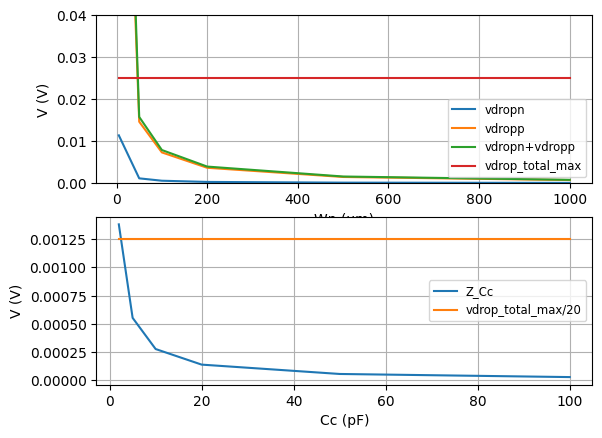

In [37]:
# ID vs VDS
fig, axs = plt.subplots(2,1)

#axs[0].set_title('sg13_lv_nmos (L=0.5um, VGS=0.75V)')
axs[0].plot(widthn*1e6, vdropn, label='vdropn')
axs[0].plot(widthn*1e6, vdropp, label='vdropp')
axs[0].plot(widthn*1e6, vdropn+vdropp, label='vdropn+vdropp')
axs[0].plot(widthn*1e6, np.array(vdrop_total_max)*[1,1,1,1,1,1], label='vdrop_total_max')
axs[0].set_ylabel('V (V)')
axs[0].set_xlabel('Wn (um)')
axs[0].set_ylim(0,0.04)
axs[0].grid()
axs[0].legend(loc='best',fontsize='small')

axs[1].plot(Cc*1e12, vdropcc, label='Z_Cc')
axs[1].plot(Cc*1e12, np.array(vdrop_total_max)*[1,1,1,1,1,1]*0.05, label='vdrop_total_max/20')
axs[1].set_ylabel('V (V)')
axs[1].grid()
axs[1].legend(loc='best',fontsize='small')
axs[1].set_xlabel('Cc (pF)')


plt.show()

In [38]:
# output W
#sp1 = CubicSpline(np.flip(vdropp),np.flip(widthp))
#widthp_val = sp1(vdrop_total_max)
widthp_val = np.interp(vdrop_total_max,np.flip(vdropp),np.flip(widthp))

# increase Wp by 10% to add Wn
widthp_val = 1.1*widthp_val
print('widthp_val = ' + str(widthp_val))
print('widthp_val/2 = ' + str(widthp_val/2))

#sp1 = CubicSpline(np.flip(vdropn),np.flip(widthn))
#widthn_val = sp1(vdrop_total_max-np.interp(widthp_val,widthp,vdropp))
vdn=vdrop_total_max-np.interp(widthp_val,widthp,vdropp)
widthn_val = np.interp(vdn,np.flip(vdropn),np.flip(widthn))
print('widthn_val = ' + str(widthn_val))
print('widthn_val/2 = ' + str(widthn_val/2))

# output Cc
#sp2 = CubicSpline(np.flip(vdropcc),np.flip(Cc))
Cc_val = np.interp(vdrop_total_max*0.025,np.flip(vdropcc),np.flip(Cc))
print('Cc_val = ' + str(Cc_val))

widthp_val = 5.109598214285714e-05
widthp_val/2 = 2.554799107142857e-05
widthn_val = 8.67543683470569e-06
widthn_val/2 = 4.337718417352845e-06
Cc_val = 4.7391771964285706e-12
